## <span style="color:green">1. Descargar los datos</span>

In [70]:
##Importamos las librerías principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [71]:
## Definimos una función para extaer los datos
#DWONLOAD_ROOT es la base del Github donde se estará descargando la base de datos.

data_base= "hospitalizaciones_train.csv"
test="hospitalizaciones_test.csv"
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/mayteet/Proyecto_Individual_2/main/"


#Complementos con la dirección específica de la base de datos que queremos.

def extraer_datos(root,database):
    csv_path= root+database
    return pd.read_csv(csv_path)

In [73]:

# Archivo con el que se hace la prueba final
prueba_final= extraer_datos(DOWNLOAD_ROOT, test)

#Archivo para revisar datos
df1= extraer_datos(DOWNLOAD_ROOT, data_base)


## <span style="color:green">2. Limpieza de datos y Train Test Split</span>

In [75]:
# Arreglamos los datos

#Definimos la función label encoder para tratar los datos categoricos

def label_encoder(datos_categoria):
    le= LabelEncoder()
    df1[datos_categoria]=le.fit_transform(df1[datos_categoria])
    
#Definimos las variables categóricas de interés

cat=["Department", "Ward_Facility_Code", "doctor_name","Age", "gender", "Type of Admission", "Severity of Illness", "health_conditions", "Insurance"]

#Convertimos las variables clases a numéricas
for l in cat:
    label_encoder(l)


#Convertimos la columna Stay (in days) en valores de 0 y 1
df1["Tipo_estadia"]= np.where(df1["Stay (in days)"] <=8, 0,1)
    

#Quitamos columnas de no interés (patientid, Stay (in days))
df1= df1.drop(["Stay (in days)", "patientid"], axis=1)

In [76]:
df1

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Tipo_estadia
0,4,2,3,8,0,4,0,1,0,1,4,1,2966.408696,0
1,4,2,1,8,2,3,0,1,1,2,2,0,3554.835677,1
2,2,2,1,8,8,2,0,1,0,1,2,1,5624.733654,0
3,4,2,3,4,7,3,0,2,2,4,4,0,4814.149231,0
4,2,1,4,2,10,7,1,1,2,1,2,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,1,3,0,1,1,0,3,1,3902.291076,0
409996,5,2,3,3,5,2,0,1,0,5,4,0,4771.995223,1
409997,4,2,3,6,9,2,0,0,1,0,4,1,3816.994210,1
409998,10,2,3,4,10,2,0,1,2,5,2,1,3841.577491,1


In [77]:
#Crear set de entrenamiento y set de prueba
X= df1.drop(["Tipo_estadia"], axis=1)
y= df1["Tipo_estadia"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_y, y_test= train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

## <span style="color:green">3. Modelo de clasificacion binario</span>

In [78]:
#Modelo SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_y)

c:\Users\mayte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(random_state=42)

## <span style="color:green">4. Medidas de desempeño</span>

In [79]:
#Cross validation/K-folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_y, cv=3, scoring="accuracy")


array([0.62000841, 0.56615112, 0.54163885])

## <span style="color:green">5. Matriz de confusión</span>

In [80]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd, X_train, y_train_y, cv=3)

In [81]:
y_train_pred

array([1, 1, 1, ..., 0, 1, 0])

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y, y_train_pred)

array([[ 81511,  42062],
       [ 97032, 107395]], dtype=int64)

## <span style="color:green">6. Precisión y Recall</span>

In [83]:
from sklearn.metrics import precision_score, recall_score
p=precision_score(y_train_y, y_train_pred)
r= recall_score(y_train_y, y_train_pred)
p,r

(0.7185678824009581, 0.525346456192186)

## <span style="color:green">7. Interamos</span>

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train_y )

RandomForestClassifier(random_state=42)

In [85]:
y_train_pred=cross_val_predict(rfc,X_train,y_train_y, cv=3)


In [86]:
confusion_matrix(y_train_y, y_train_pred)

array([[ 82919,  40654],
       [ 35359, 169068]], dtype=int64)

In [87]:
p=precision_score(y_train_y, y_train_pred)
r= recall_score(y_train_y, y_train_pred)
p,r

(0.8061529071818884, 0.8270336110200708)

In [88]:
#f1
from sklearn.metrics import f1_score
f1_score(y_train_y, y_train_pred)

0.8164597765538489

## <span style="color:green">8. Umbral precision</span>

In [61]:
y_scores= cross_val_predict(sgd, X_train, y_train_y, cv=3, method= "decision_function")

In [62]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

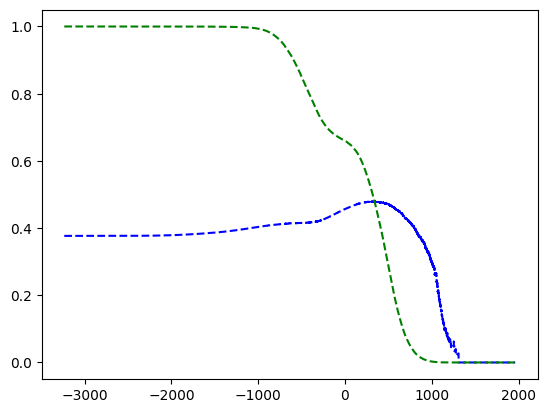

In [63]:
plt.plot(umbrales, precisions[:-1],"b--", label="Precision")
plt.plot(umbrales, recalls[:-1],"g--", label="Recalls")

In [65]:
umbral_90= umbrales[np.argmax(precisions>=.40)]

In [66]:
umbral_90

-1086.4469130411626

## <span style="color:green">8. Curva ROC</span>

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr, umbrales= roc_curve(y_train_y, y_scores)

In [90]:
y_test_pred=rfc.predict(X_test)

In [92]:
resul= pd.DataFrame(y_test_pred)
resul= resul.rename(columns={0:"pred"})
resul.to_csv("mayteet.csv", index=False)
